In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

1 -> N = 10^8

2 -> N = 10^6

3 -> N = 10^3

In [18]:
P = 8

In [19]:
df = [0] * P
df2 = [0] * P
df3 = [0] * P
for  i in range(P):
    df[i] = pd.read_csv(f"out_{i+1}.txt", skiprows = 1, names = ["номера_процессов", "время_выполнения"])
    df2[i] = pd.read_csv(f"2out_{i+1}.txt", skiprows = 1, names = ["номера_процессов", "время_выполнения"])
    df3[i] = pd.read_csv(f"3out_{i+1}.txt", skiprows = 1, names = ["номера_процессов", "время_выполнения"])
    
for i in range(1, P):
    df[i].sort_values(by=["номера_процессов"])
    df2[i].sort_values(by=["номера_процессов"])
    df3[i].sort_values(by=["номера_процессов"])

In [20]:
df3[0]

,номера_процессов,время_выполнения
0,0,0.591583


In [21]:
df3[7]

,номера_процессов,время_выполнения
0,4,0.096926
1,5,0.096709
2,6,0.096889
3,7,0.096703
4,0,0.096927
5,2,0.096887
6,3,0.096707
7,1,0.096706


In [22]:
baseline_time = df[0]["время_выполнения"]
baseline_time2 = df2[0]["время_выполнения"]
baseline_time3 = df3[0]["время_выполнения"]

acceleration_id = [1 +  i for i in range(0, P)]
acceleration = np.ones(P)
acceleration2 = np.ones(P)
acceleration3 = np.ones(P)

for i in range(1, P):
    
    acceleration[i] = baseline_time / np.max(df[i]['время_выполнения'])
    acceleration2[i] = baseline_time2 / np.max(df2[i]['время_выполнения'])
    acceleration3[i] = baseline_time3 / np.max(df3[i]['время_выполнения'])
    print(acceleration[i])

0.4109589041095891
0.34090909090909094
0.25210084033613445
0.06564551422319476
0.3
0.24
0.1986754966887417


In [23]:
acceleration_id

[1, 2, 3, 4, 5, 6, 7, 8]

Text(0, 0.5, 'Ускорение')

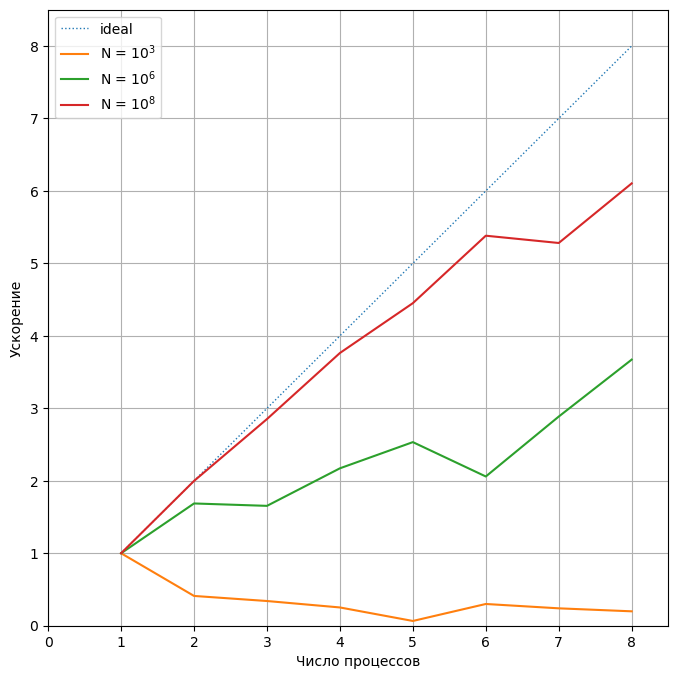

In [30]:
plt.figure(figsize=(8,8))
plt.plot([i+1 for i in range(8)], acceleration_id, label = "ideal", ls = ":", lw = 1.0)
plt.plot([i+1 for i in range(8)],acceleration, label = "N = $10^3$")
plt.plot([i+1 for i in range(8)],acceleration2, label = "N = $10^6$")
plt.plot([i+1 for i in range(8)],acceleration3, label = "N = $10^8$")
plt.xlim(0, max(df[-1]['номера_процессов']) + 1.5)
plt.ylim(0, max(acceleration_id) + 0.5)
plt.grid()
plt.legend()
plt.xlabel("Число процессов")
plt.ylabel("Ускорение")